In [1]:
import os
import json
import torch
import pickle
import pprint
import matplotlib.pyplot as plt
import supervision as sv
import numpy as np
import torch.nn.functional as F
from tqdm import tqdm

In [6]:
def xywh2ratio(img_w, img_h, bbox):
    # bbox_left, bbox_top, bbox_width, bbox_height = bbox

    # cx = (bbox_left + bbox_width/2.0)
    # cy = (bbox_top + bbox_height/2.0)

    # cx = 0 if cx < 0 else cx
    # cx = img_w if cx > 0 else cx
    # cy = 0 if cy < 0 else cy
    # cy = img_h if cy > 0 else cy

    # x_center_ratio = cx/img_w
    # y_center_ratio = cx/img_h
    # w_ratio = bbox_width/img_w
    # h_ratio = bbox_height/img_h

    # x, y, h, w = bbox
    x, y, w, h = bbox
    x_center = x + w/2.0
    y_center = y + h/2.0
    x_center_ratio = x_center/img_w * 1.0
    y_center_ratio = y_center/img_h * 1.0
    w_ratio = w/img_w * 1.0
    h_ratio = h/img_h * 1.0


    return [x_center_ratio, y_center_ratio, w_ratio, h_ratio]


bdd100k_det = {
    0: "pedestrian",
    1: "rider",
    2: "car",
    3: "truck",
    4: "bus",
    5: "train",
    6: "motorcycle",
    7: "bicycle",
    8: "traffic light",
    9: "traffic sign"
}

# PROMPT TRAFFIC
bdd100k_traffic = {
    0: "traffic light",
    1: "traffic sign"
}
bdd100k_traffic_map = {
    8: 0,
    9: 1
}

# PROMPT VEHICLE
bdd100k_vehicle = {
    0: "car",
    1: "truck",
    2: "bus",
    3: "train"
}
bdd100k_vehicle_map = {
    2: 0,
    3: 1,
    4: 2,
    5: 3,
}

# PROMPT PEOPLE
bdd100k_people = {
    0: "pedestrian",
    1: "rider",
    2: "motorcycle",
    3: "bicycle"
}
bdd100k_people_map = {
    0: 0,
    1: 1,
    6: 2,
    7: 3,
}

subset_name = 'vehicle'
bdd100k_det_subset = bdd100k_vehicle
bdd100k_det_map = bdd100k_vehicle_map

In [7]:
HOME = '/home/belay/Documents/github_others/GroundingDINO'
pp = pprint.PrettyPrinter(indent=4)
print(f'HOME={HOME}')

weight_name = "groundingdino_swint_ogc.pth"
weight_path = os.path.join(HOME, "notebooks/weights", weight_name)

conf_path = '/home/belay/Documents/github_others/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py'

print(weight_path, "; exist:", os.path.isfile(weight_path))
print(conf_path, "; exist:", os.path.isfile(conf_path))

from groundingdino.util.inference import load_model, load_image, predict, annotate

saved_objs = []
model = load_model(conf_path, weight_path)



# json_dirname = 'ShuffleSplit10'
# json_name = 'Split-0_val'
# image_dir = '/media/18T/data_thesis/bdd100k/bdd100k_images_100k/images/100k/train'

json_dirname = 'OfficialVal_ShuffleSplit10'
json_name = 'Split-0'
image_dir = '/media/18T/data_thesis/bdd100k/bdd100k_images_100k/images/100k/val'


json_path = f'/media/18T/data_thesis/bdd100k/bdd100k_images_100k/{json_dirname}/{json_name}.json'

BOX_TRESHOLD = 0.10
TEXT_TRESHOLD = 0.10
pkl_dir = '/home/belay/Documents/github_others/GroundingDINO/injects'
pkl_path = f'{pkl_dir}/{json_dirname}_{json_name}_box{BOX_TRESHOLD:.1f}_{subset_name}_test.pkl'

with open(json_path, 'r') as f:
    data_dict = json.load(f)

print(f'\n========== Process {len(data_dict["images"])} images ==========')

HOME=/home/belay/Documents/github_others/GroundingDINO
/home/belay/Documents/github_others/GroundingDINO/notebooks/weights/groundingdino_swint_ogc.pth ; exist: True
/home/belay/Documents/github_others/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



========== Process 1000 images ==========


0it [00:00, ?it/s]

Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Append classname(0)=car
Process /media/18T/data_thesis/bdd100k/bdd100k_images_100k/images/100k/val/b1c66a42-6f7d68ca.jpg ...
Original gt_bboxes = 19
Original gt_labels = 19
Original pred_bboxes.shape = torch.Size([12, 4])
Filtered gt_bboxes = 12, Filtered gt_labels = 12
Return sub_tokens = ['car', 'truck', 'bus', 'train']
Return class_logits = torch.Size([19, 4])
Return class_logits = tensor([[0.1912, 0.0609, 0.0204, 0.0136],
        [0.1328, 0.0294, 0.0113, 0.0119],
        [0.3293, 0.0345, 0.0170, 0.0115],
        [0.1494, 0.0368, 0.0133, 0.0097],
        [0.2

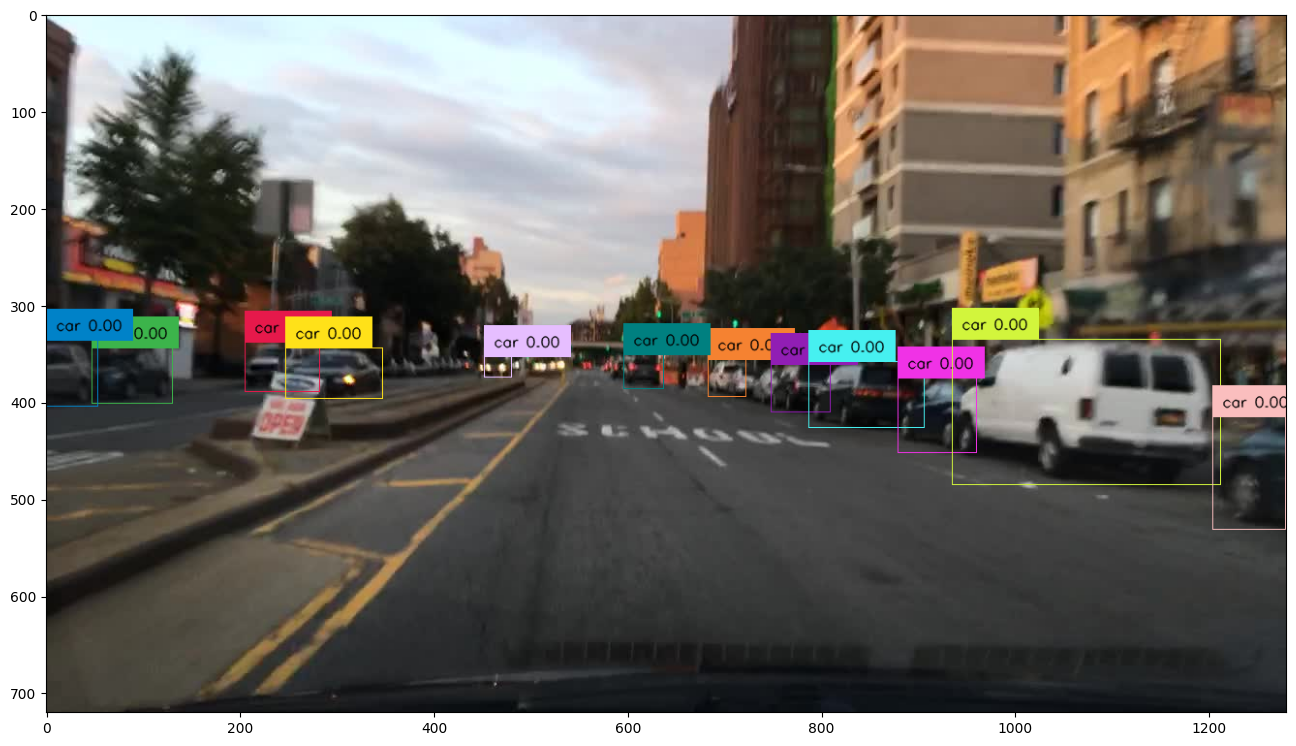

-------- Predected bbox (Grounding DINO) ------------


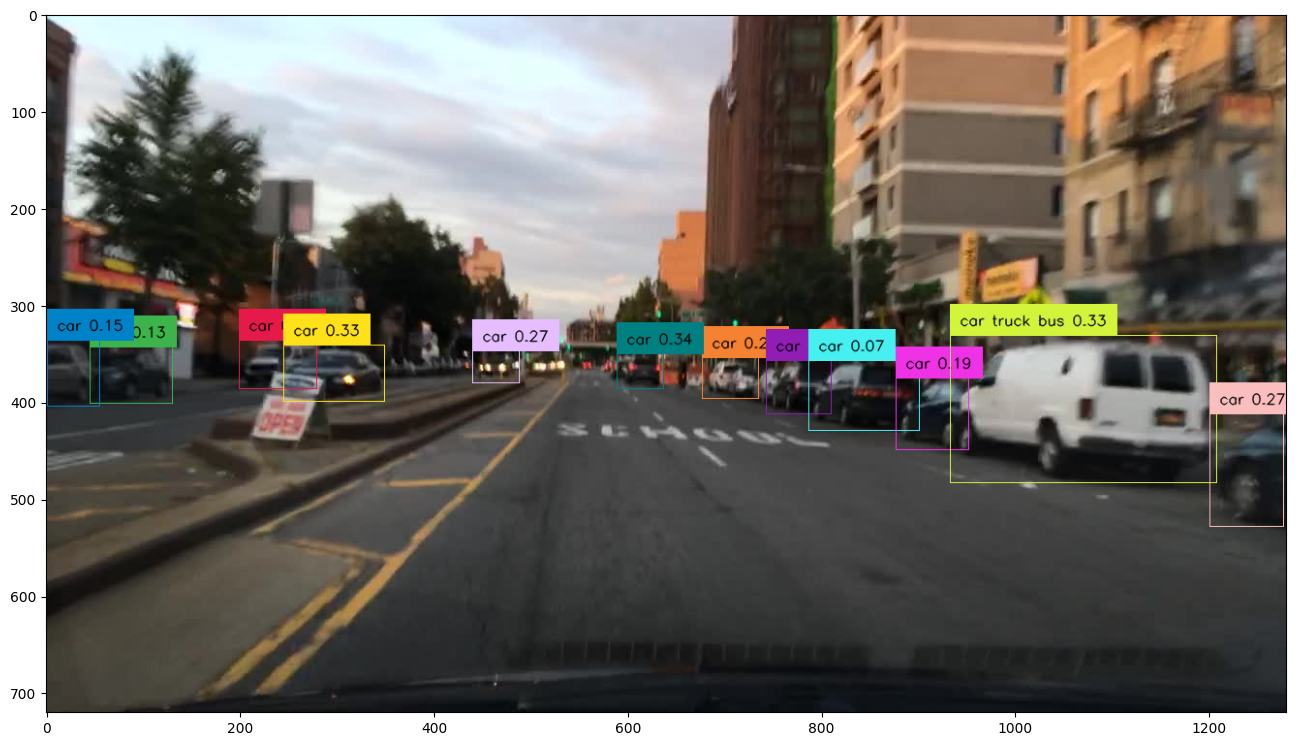

-------------- pred_labels bbox --------------


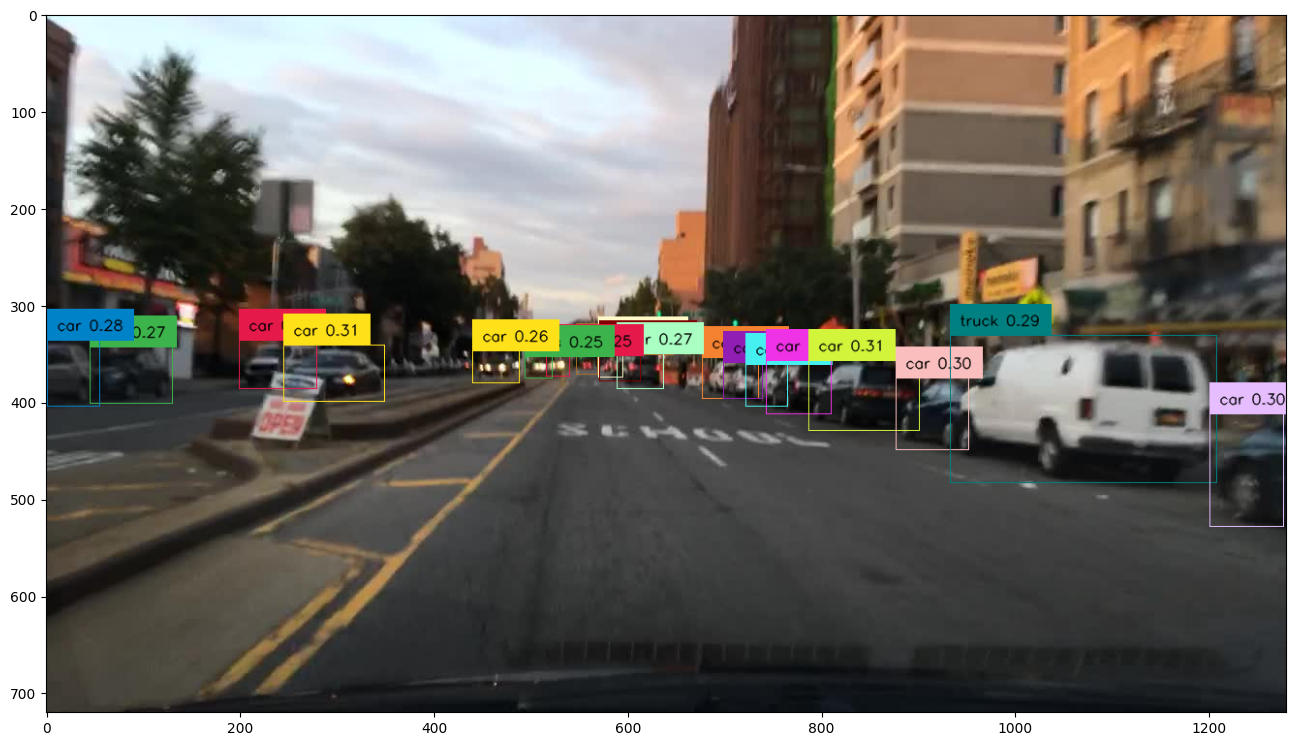

1000it [00:00, 1041.85it/s]


In [12]:
for idx, coco_img_obj in tqdm(enumerate(data_dict['images'])):

    # Testing
    #if idx == 5:
    #    break

    saved_obj = {
        # 'img': None,
        'img_shape': (coco_img_obj['height'], coco_img_obj['width']),
        # 'img_feature': None,
        'img_path': os.path.join(image_dir, coco_img_obj['file_name']),
        'img_name': coco_img_obj['file_name'],
        'gt_bboxes': [],
        'gt_labels': [],
        'gt_labels_des': [],
        'sub_tokens': None,
        'token_logits': None,
        'class_logits': None,
        'pred_bboxes': None,
        # 'pred_labels': None,
        # 'pred_labels_des': None,
    }



    image_name = coco_img_obj['file_name']
    
    if image_name != 'b1c66a42-6f7d68ca.jpg':
        continue
    
    
    for anno in data_dict['annotations']:

        if coco_img_obj['id'] == anno['image_id']:

            bbox = xywh2ratio(coco_img_obj['width'], coco_img_obj['height'], anno['bbox'])
            classid = anno["category_id"]-1
            classname = bdd100k_det[classid]
            

            if classname not in list(bdd100k_det_subset.values()):
                continue
            
            new_classid = bdd100k_det_map[classid]
            saved_obj['gt_bboxes'].append(bbox)
            saved_obj['gt_labels'].append(new_classid)
            saved_obj['gt_labels_des'].append(classname)
            print(f'Append classname({new_classid})={classname}')

    

    if len(saved_obj['gt_bboxes']) == 0:
        #print('skip 1')
        continue


    IMAGE_PATH = saved_obj['img_path']

    print(f'Process {IMAGE_PATH} ...')

    # here
    #TEXT_PROMPT = "car,pedestrian,   crosswalk"
    #TEXT_PROMPT = 'car, truck, bus, pedestrian, rider, train, motorcycle, bicycle, traffic light, traffic sign'
    # TEXT_PROMPT = "traffic light, traffic sign,crosswalk,  car"

    TEXT_PROMPT = ','.join(bdd100k_det_subset.values())

    

    image_source, image = load_image(IMAGE_PATH)
    

    pred_bboxes, pred_bboxes_unmasked, logits, phrases, sub_tokens, token_logits, class_logits, mask, tokenidx2class, class2tokenidx = predict(
        model=model, 
        bboxes = saved_obj['gt_bboxes'],
        image=image, 
        caption=TEXT_PROMPT, 
        box_threshold=BOX_TRESHOLD, 
        text_threshold=TEXT_TRESHOLD
    )

    print(f'Original gt_bboxes = {len(saved_obj["gt_bboxes"])}')
    print(f'Original gt_labels = {len(saved_obj["gt_labels"])}')
    print(f'Original pred_bboxes.shape = {pred_bboxes.shape}')
    
    
    #saved_obj['img_shape'] = [i for i, m in zip(saved_obj['img_shape'], mask) if m is True]
    #saved_obj['img_path'] = [i for i, m in zip(saved_obj['img_path'], mask) if m is True]
    #saved_obj['img_name'] = [i for i, m in zip(saved_obj['img_name'], mask) if m is True]
    saved_obj['gt_bboxes'] = [i for i, m in zip(saved_obj['gt_bboxes'], mask) if m is True]
    saved_obj['gt_labels'] = [i for i, m in zip(saved_obj['gt_labels'], mask) if m is True]
    saved_obj['gt_labels_des'] = [i for i, m in zip(saved_obj['gt_labels_des'], mask) if m is True]

    print(f'Filtered gt_bboxes = {len(saved_obj["gt_bboxes"])}, Filtered gt_labels = {len(saved_obj["gt_labels"])}')
    print(f'Return sub_tokens = {sub_tokens}')
    print(f'Return class_logits = {class_logits.shape}')
    print(f'Return class_logits = {class_logits}')
    print(f'Return class_logits.max(dim=1)[0] = {class_logits.max(dim=1)[0]}')

    saved_obj['pred_bboxes'] = pred_bboxes
    #saved_obj['sub_tokens'] = sub_tokens
    #saved_obj['token_logits'] = token_logits
    saved_obj['class_logits'] = class_logits
    probs = F.softmax(class_logits, dim=-1)
    maxprob = probs.max(axis=1)[0]
    maxprob_idx = np.argmax(probs, axis=1)
    print(f'maxprob={maxprob}')
    print(f'maxprob_idx={maxprob_idx}')
    print(f'phrases={phrases}')
    pred_labels = [bdd100k_det_subset[i.item()] for i in maxprob_idx]
    
    assert len(saved_obj['gt_bboxes']) == pred_bboxes.shape[0]
    assert len(saved_obj['class_logits']) == pred_bboxes_unmasked.shape[0]

    if len(saved_obj['gt_bboxes']) == 0 or pred_bboxes.shape[0] == 0:
        #print('skip 2')
        continue

    #print(f"[Saved] gt_labels[0]={saved_obj['gt_labels'][0]}")
    #print(f"[Saved] gt_labels_des[0]={saved_obj['gt_labels_des'][0]}")
    #print(f"[Saved] gt_bboxes[0]={saved_obj['gt_bboxes'][0]}")
    #print(f"[Saved] class_logits[0]={saved_obj['class_logits'][0]}")
    #print(f"[Saved] pred_bboxes[0]={saved_obj['pred_bboxes'][0]}")

    saved_objs.append(saved_obj)
    
    print('-------------- Ground Truth bbox --------------')
    annotated_frame = annotate(
        image_source=image_source, 
        boxes=torch.Tensor(saved_obj['gt_bboxes']), 
        logits=torch.Tensor([0]*len(saved_obj['gt_bboxes'])), 
        phrases=saved_obj['gt_labels_des'])

    %matplotlib inline
    sv.plot_image(annotated_frame, (16, 16))

    print('-------- Predected bbox (Grounding DINO) ------------')


    annotated_frame = annotate(
        image_source=image_source, 
        #boxes=torch.Tensor(saved_obj['gt_bboxes']), 
        boxes=pred_bboxes, 
        logits=saved_obj['class_logits'].max(dim=1)[0], 
        phrases=phrases)

    %matplotlib inline
    sv.plot_image(annotated_frame, (16, 16))

    print('-------------- pred_labels bbox --------------')
    annotated_frame = annotate(
        image_source=image_source, 
        boxes=pred_bboxes_unmasked, 
        logits=maxprob, 
        phrases=pred_labels)

    %matplotlib inline
    sv.plot_image(annotated_frame, (16, 16))

In [10]:
pred_bboxes

tensor([[0.1868, 0.5022, 0.0624, 0.0697],
        [0.0688, 0.5173, 0.0663, 0.0808],
        [0.2324, 0.5148, 0.0819, 0.0800],
        [0.0221, 0.5143, 0.0424, 0.0945],
        [0.5523, 0.5219, 0.0453, 0.0590],
        [0.6072, 0.5348, 0.0523, 0.0758],
        [0.6595, 0.5464, 0.0889, 0.1005],
        [0.7148, 0.5730, 0.0586, 0.1038],
        [0.8367, 0.5665, 0.2151, 0.2113],
        [0.9686, 0.6534, 0.0593, 0.1617],
        [0.4794, 0.5116, 0.0376, 0.0501],
        [0.3627, 0.5058, 0.0375, 0.0453]])

In [ ]:
torch.Tensor(saved_obj['gt_bboxes'])